# Categorica Correlation

This notebook shows categorical correlations.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
odf = pd.read_csv(r'../data/Collisions.csv', parse_dates=["INCDTTM"], dtype={'SDOT_COLCODE':object, })
odf.columns = map(str.lower, odf.columns)


In [36]:
"""
Clean the data.
Clean the categorical data.
"""
df = odf.copy()

#df['location'] = df['location'].astype('str')

df.drop('objectid', inplace=True, axis = 1)

df.drop('inckey', inplace=True, axis = 1)

df.drop('coldetkey', inplace=True, axis = 1)

# truncate report number, first part of report string might be useful

df['reporttype'] = np.where( df['reportno'].str.startswith('EA'), 'EA', np.where(df['reportno'].str.startswith('E'), 'E', np.where(df['reportno'].str.startswith('C'), 'C', 'N')))
df.drop('reportno', inplace=True, axis = 1)


# status seems to correspond to whether an st_colcode exists, maybe there are two systems and the values were merged. if it is matched, then collisiontype, lighcond, roadcond, and weather are present.
df['status'] = df['status'].astype('category')

#df['addrtype'].fillna(value='N/A', inplace=True)
df['addrtype'] = df['addrtype'].astype('category')

#df.drop('intkey', inplace=True, axis = 1)

"""
This feature sometimes imports a string ' ' other times NaN, so unify those.
"""
loc = df['exceptrsncode'] == 'NEI'
df.loc[loc, 'exceptrsncode'] = 1
df.loc[~loc, 'exceptrsncode'] = 0
df['exceptrsncode'] = df['exceptrsncode'].astype(np.bool)

df.drop('exceptrsndesc', inplace=True, axis = 1)

#df['severitycode'].fillna(value='N/A', inplace=True)
df['severitycode'] = df['severitycode'].astype('category')

df.drop('severitydesc', inplace=True, axis = 1)

#df['collisiontype'].fillna(value='N/A', inplace=True)
df['collisiontype'] = df['collisiontype'].astype('category')

# np.all(df['incdttm'].dt.to_period('d') == df['incdate'].dt.to_period('d')) == True, seems safe to drop incdate
df.drop('incdate', inplace=True, axis = 1)

#df['junctiontype'].fillna(value='N/A', inplace=True)
df['junctiontype'] = df['junctiontype'].astype('category')

df.loc[df['sdot_colcode']==0.0, 'sdot_colcode'] = np.nan
#df['sdot_colcode'].fillna(value='N/A', inplace=True)
df['sdot_colcode'] = df['sdot_colcode'].astype('category')


df['severitycode'].value_counts(dropna=False)


df.drop('sdot_coldesc', inplace=True, axis = 1)

df['severitycode'].value_counts(dropna=False)


loc = ~df['inattentionind'].isna()
df.loc[loc, 'inattentionind'] = 1
df['inattentionind'].fillna(value=0, inplace=True)
df['inattentionind'] = df['inattentionind'].astype(np.bool)

df['severitycode'].value_counts(dropna=False)


"""
underinfl switched from 0/1 to Y/N over time
df2 = df.set_index('incdttm')
g = df2['underinfl'].isna().groupby(pd.Grouper(freq='Y'))
g.value_counts()
"""
loc = np.logical_or(df['underinfl'] == 'Y',df['underinfl'] == '1')
df.loc[loc, 'underinfl'] = 1
loc = np.logical_or(df['underinfl'] == 'N', df['underinfl'] == '0')
df.loc[loc, 'underinfl'] = 0
df['underinfl'] = df['underinfl'].astype(np.bool)


df['severitycode'].value_counts(dropna=False)

#df['weather'].fillna(value='N/A', inplace=True)
#df = df[~df['weather'].isna()]
df['weather'] = df['weather'].astype('category')

#df['roadcond'].fillna(value='N/A', inplace=True)
#df = df[~df['roadcond'].isna()]
df['roadcond'] = df['roadcond'].astype('category')

#df['lightcond'].fillna(value='N/A', inplace=True)
df['lightcond'] = df['lightcond'].astype('category')


df['severitycode'].value_counts(dropna=False)


loc = ~df['pedrownotgrnt'].isna()
df.loc[loc, 'pedrownotgrnt'] = 1
df['pedrownotgrnt'].fillna(value=0, inplace=True)
df['pedrownotgrnt'] = df['pedrownotgrnt'].astype(np.bool)


df['severitycode'].value_counts(dropna=False)


"""
sdotcolnum stopped being applied over time
df2 = df.set_index('incdttm')
g = df2['sdotcolnum'].isna().groupby(pd.Grouper(freq='Y'))
g.value_counts()
"""
df.drop('sdotcolnum', inplace=True, axis = 1)


df['severitycode'].value_counts(dropna=False)


loc = ~df['speeding'].isna()
df.loc[loc, 'speeding'] = 1
df['speeding'].fillna(value=0, inplace=True)
df['speeding'] = df['speeding'].astype(np.bool)


df.loc[df['st_colcode']==' ', 'st_colcode'] = np.nan
#df['st_colcode'].fillna(value='N/A', inplace=True)
df['st_colcode'] = df['st_colcode'].astype('category')


df.drop('st_coldesc', inplace=True, axis = 1)

df['severitycode'].value_counts(dropna=False)
"""
If we knew more about the lane key like northbound/southbound, etc., it would be more useful.
At least record whether the key is present.
"""
loc = df['seglanekey'] == '0'
df.loc[loc, 'seglanekey'] = 0
df.loc[~loc, 'seglanekey'] = 1
df['seglanekey'] = df['seglanekey'].astype(np.bool)
# actually for this demo just drop the column
df.drop('seglanekey', inplace=True, axis = 1)

"""
Knowing if a crosswalk was involved is interesting.
"""
loc = df['crosswalkkey'] == '0'
df.loc[loc, 'crosswalkkey'] = 0
df.loc[~loc, 'crosswalkkey'] = 1
df['crosswalkkey'] = df['crosswalkkey'].astype(np.bool)
# actually for this demo just drop the column
df.drop('crosswalkkey', inplace=True, axis = 1)

loc = df['hitparkedcar'] == 'N'
df.loc[loc, 'hitparkedcar'] = 0
df.loc[~loc, 'hitparkedcar'] = 1
df['hitparkedcar'] = df['hitparkedcar'].astype(np.bool)

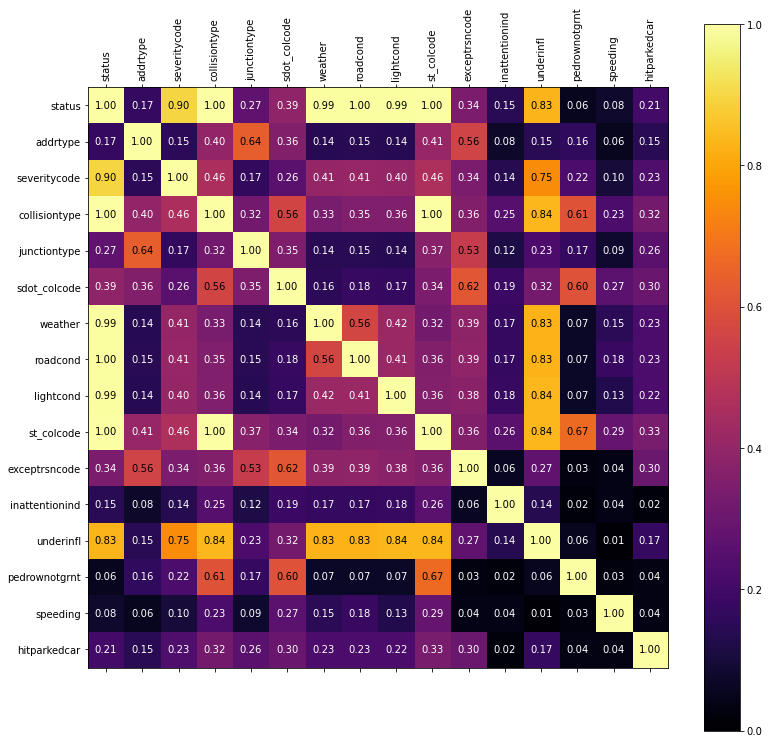

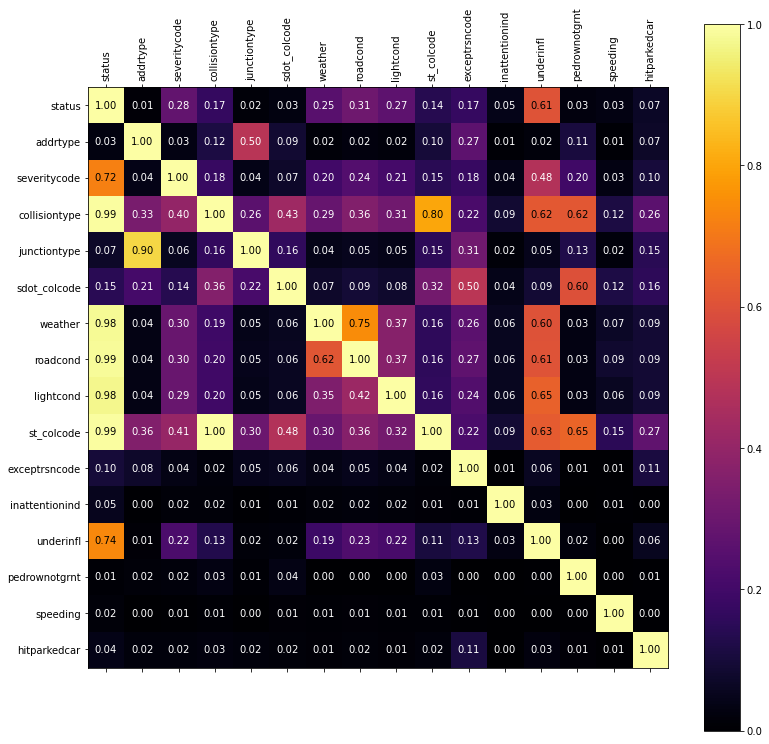

In [41]:
"""
Perform correlation.
"""

def plot(corr, cols):
    fig = plt.figure(figsize=(13,13))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap="inferno", vmin=0, vmax=1)
    
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.2f}'.format(z), color='k' if z > 0.5 else 'w', ha='center', va='center')
    
    fig.colorbar(cax)
    ticks = np.arange(0, len(cols), 1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(cols, rotation=90, horizontalalignment="center")
    ax.set_yticklabels(cols)
    plt.show();

    

"""
cramer's v is symmetric nominal association.
"""
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    #print(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    #print(chi2)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


"""
source:
https://github.com/shakedzy/dython/blob/master/dython/nominal.py
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
"""
import math
import numpy as np
from collections import Counter
def conditional_entropy(x, y):
    _, yv, yc = np.unique(y, return_counts=True, return_inverse=True)
    xy = np.dstack([x, y])
    xy, xyv, xyc = np.unique(xy, return_counts=True, return_inverse=True, axis=1)
    ent = -(np.log(xyc[xyv])-np.log(yc[yv])).sum()/len(x)
    return ent


def entropy(x):
    _, xv, xc = np.unique(x, return_counts=True, return_inverse=True)
    ent = -(np.log(xc[xv])-np.log(len(x))).sum()/len(x)
    return ent
"""
theil's u is asymmetric nominal association.
"""
def theils_u(x, y):
    s_xy = conditional_entropy(x, y)
    ent = entropy(x)
    res = (ent - s_xy) / ent if ent else 1
    return res
    
    
    
"""
create df copy where we replace category labels with actual numeric codes.
"""
df2 = df.copy()
cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)

"""
Combine cat coded cols and binary cols to creat a short list of categories we might be interested in.
"""
cols = df2.select_dtypes(np.int8).columns.tolist() + df2.select_dtypes(np.bool).columns.tolist()

"""
run it. plot it.
"""
corr = df2[cols].corr(method=cramers_v)
plot(corr, cols)

x, y = np.meshgrid(cols, cols)
corr = np.array([theils_u(df2[x], df2[y]) for (x, y) in zip(x.flatten(), y.flatten())]).reshape(len(cols), len(cols))
plot(corr, cols)

# Eliminate noise

To eliminate unwanted correlation and noise, lets focus only on high sev collisions.

Below you see by looking down column for severitycode that when we exclude severitycode=1=Unknown, the correlation mostly vanishes.

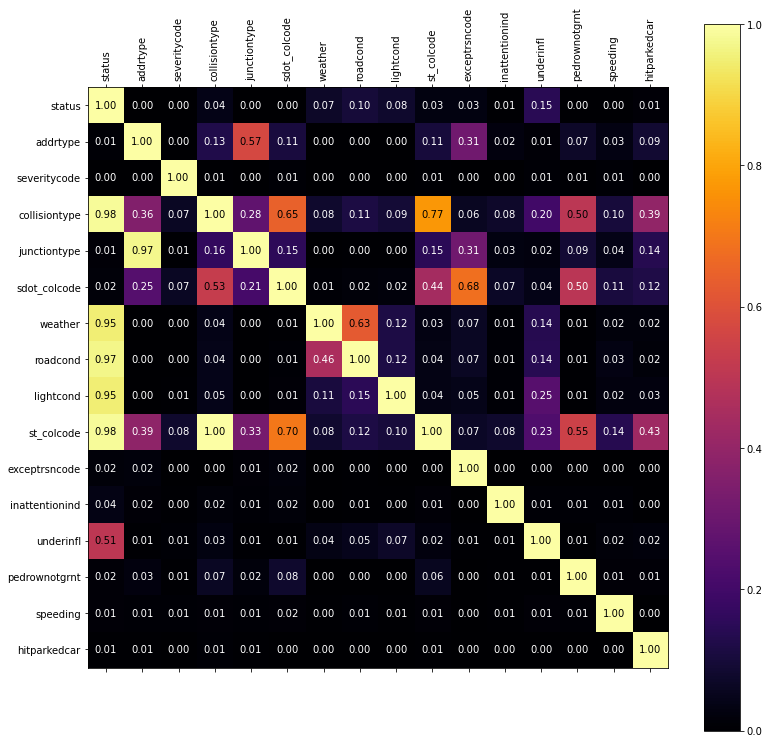

In [43]:
df2 = df.copy()
df2 = df2[(df2['severitycode']=='2')|(df2['severitycode']=='2b')|(df2['severitycode']=='3')|(df2['severitycode']=='3')]

cat_columns = df2.select_dtypes(['category']).columns

for cc in cat_columns:
    df2[cc].cat.remove_unused_categories(inplace=True)
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)


cols = df2.select_dtypes(np.int8).columns.tolist() + df2.select_dtypes(np.bool).columns.tolist()


"""
run it. plot it.
"""

x, y = np.meshgrid(cols, cols)
corr = np.array([theils_u(df2[x], df2[y]) for (x, y) in zip(x.flatten(), y.flatten())]).reshape(len(cols), len(cols))
plot(corr, cols)